To do:
- create per division mean value of:
    - rounds **DONE** 
    - age **DONE**
    - bouts **DONE**
    - wins **DONE**
    - losses **DONE**
    - draws **DONE**
    - height **DONE**
    - reach 
        - reach relative to height
    - time since debut >> == (current date - debut)

- for values missing in:
    - age: **DONE**
        - no data = average age of division 
    - reach:
        - reach == (height + reach relative to height for division)
    - height: **DONE**
        - average weight of division and replace missing values with this...
    - stance:
        unclear...

age - missing = 19/793 - pct missing = 2.4%
stance - missing = 82/793 - pct missing = 10.34%    
height - missing = 98/793 - pct missing = 12.36%    
reach - missing = 380/793 - pct missing = 47.92%    
birth place - missing = 79/793 - pct missing = 9.96%

In [1]:
import pandas as pd
import numpy as np

boxrec_data = pd.read_csv('boxrec_tables.csv')
df = pd.DataFrame(boxrec_data)


In [2]:
df.replace(to_replace='None', value=np.nan, regex=True, inplace=True)

In [3]:
df.insert(3, 'div index', '')


In [4]:
div_list = ['heavy', 'cruiser', 'lightheavy', 'supermiddle', 'middle', 'superwelter', 'welter', 'superlight', 'light', 'feather', 'superbantam', 'bantam', 'superfly', 'fly', 'lightfly', 'minimum']

x = 0
for value in df['division']:
    df.at[x, 'div index'] = div_list.index(value)
    x += 1

In [5]:
ds = df.sort_values(by=['div index', 'division rating'], ascending=True)
rounds = df.sort_values(by=['rounds'], ascending = False)

In [6]:
# ds.dtypes 
# Can see age/height/reach need to be turned to float64s
cols_to_convert = ['age', 'height', 'reach']

for col in cols_to_convert:
    ds[col] = ds[col].astype(float)


In [7]:
average_by_division = ds.groupby(['division']).mean(numeric_only=True)

average_everything_numeric = ds.mean(numeric_only=True)

In [8]:
def replace_nan_with_mean(column, grouping_column):
    ds[column] = ds.groupby(grouping_column)[column].transform(lambda x: x.fillna(round(x.mean(), 2)))

In [9]:
replace_nan_with_mean('age', 'division')
replace_nan_with_mean('height', 'division')

In [10]:
diff_reach = ds.reach - ds.height
ds.insert(12, 'diff reach', diff_reach)

replace_nan_with_mean('diff reach', 'division')

In [11]:
ds.reach = ds.height + ds['diff reach']

ds

,name,division rating,division,div index,bouts,rounds,KOs,debut,age,stance,height,reach,diff reach,residence,birth place,wins,losses,draws,KO wins,KO losses
26,Oleksandr Usyk,1,heavy,0,20,168,65.00,14/12/2013,35.00,southpaw,191.00,198.00,7.00,Oxnard California,Shypyntsi Ukraine,20,0,0,13,0
339,Anthony Joshua,2,heavy,0,27,136,81.48,26/10/2013,33.00,orthodox,198.00,208.00,10.00,Watford Hertfordshire United Kingdom,Watford Hertfordshire United Kingdom,24,3,0,22,1
331,Andy Ruiz,4,heavy,0,37,187,59.46,26/06/2009,33.00,orthodox,188.00,188.00,0.00,Imperial California,Imperial California,35,2,0,22,0
283,Dillian Whyte,5,heavy,0,31,170,61.29,16/09/2011,35.00,orthodox,193.00,198.00,5.00,Brixton London United Kingdom,Port Antonio Jamaica,28,3,0,19,3
218,Joe Joyce,6,heavy,0,15,74,93.33,16/02/2018,37.00,orthodox,198.00,203.00,5.00,Putney London United Kingdom,London United Kingdom,15,0,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Loyiso Ngantweni,47,minimum,15,32,155,28.13,02/09/2003,42.00,NaN,159.67,162.76,3.09,East London Eastern Cape South Africa,Mqanduli Eastern Cape South Africa,10,17,5,9,7
696,Phumlani Maloni,48,minimum,15,12,73,25.00,25/09/2016,27.33,NaN,159.67,162.76,3.09,Eastern Cape South Africa,NaN,7,4,1,3,2
727,Yuri Kanaya,49,minimum,15,3,17,0.00,20/10/2021,26.00,orthodox,155.00,158.09,3.09,Tokyo Japan,Nakagawa Fukuoka Japan,3,0,0,0,0
778,Sora Takeda,50,minimum,15,10,43,10.00,27/08/2017,22.00,southpaw,162.00,165.09,3.09,Kumamoto Kumamoto Japan,Kumamoto Kumamoto Japan,6,4,0,1,2


<AxesSubplot: xlabel='rounds', ylabel='bouts'>

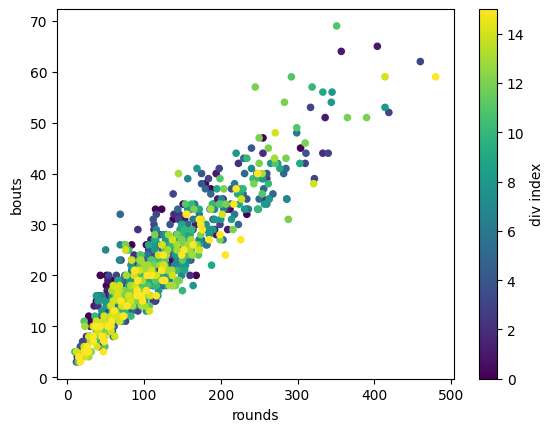

In [120]:
ds.plot.scatter(x='rounds', y='bouts', c='div index', colormap='viridis')

<AxesSubplot: xlabel='height', ylabel='reach'>

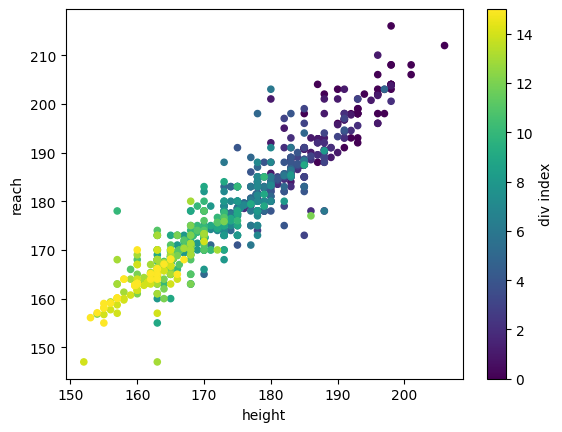

In [121]:
ds.plot.scatter(x='height', y='reach', c='div index', colormap='viridis')

<AxesSubplot: xlabel='height', ylabel='KOs'>

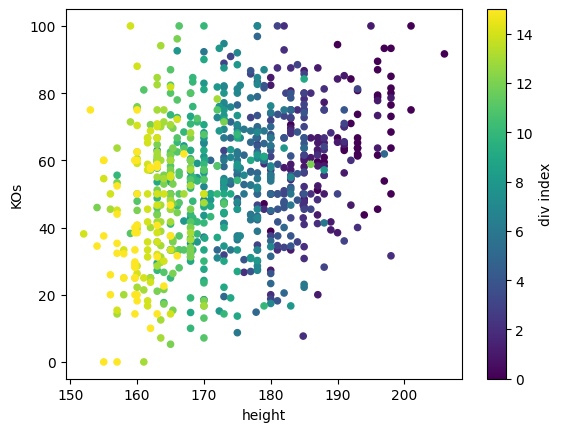

In [124]:
ds.plot.scatter(x='height', y='KOs', c='div index', colormap='viridis')

<AxesSubplot: xlabel='division rating', ylabel='wins'>

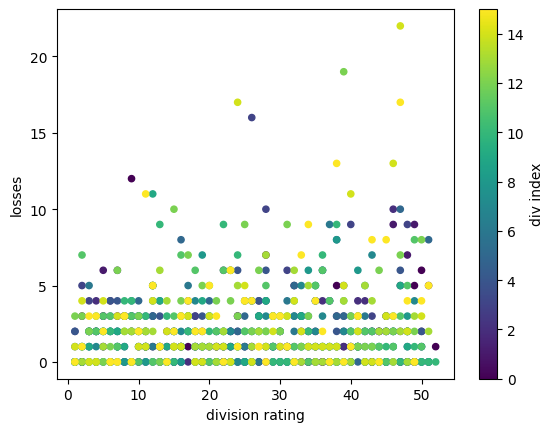

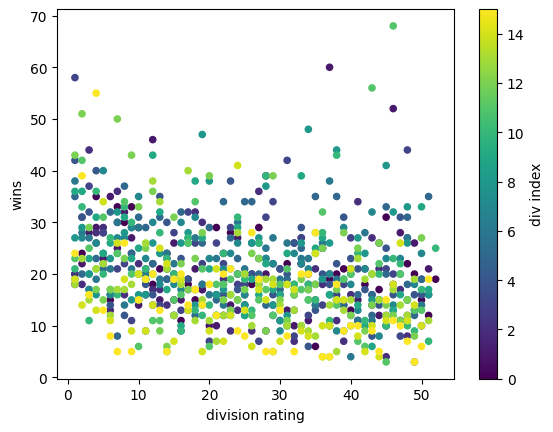

In [145]:
ds.plot.scatter(x='division rating', y='losses', c='div index', colormap='viridis')
ds.plot.scatter(x='division rating', y='wins', c='div index', colormap='viridis')

<AxesSubplot: >

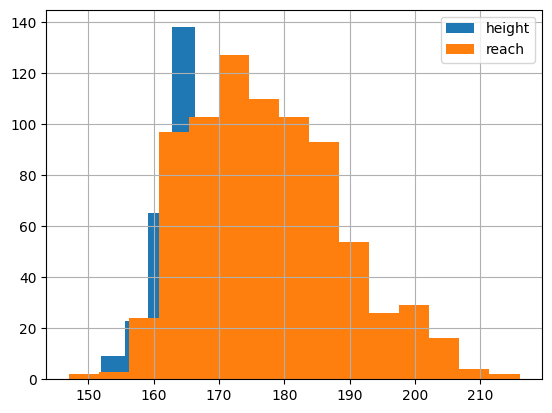

In [143]:
ds['height'].hist(bins=15, legend=True)
ds['reach'].hist(bins=15, legend=True)
